<a href="https://colab.research.google.com/github/shouvikpal8991/Assignment-3/blob/main/Assig3pr10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<Figure size 1200x600 with 0 Axes>

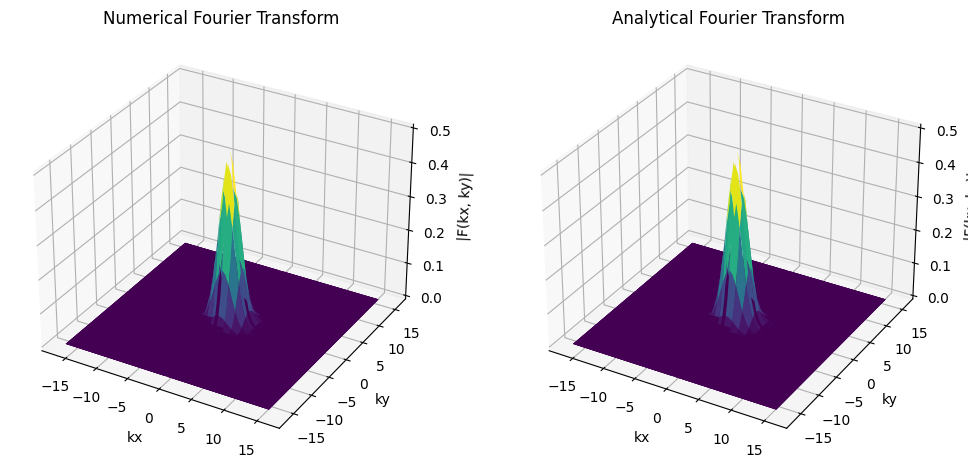

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f(x,y):
  return np.exp(-(x**2+y**2))

x_min=-6
x_max=6
num_pointsx=64 #choose a proper num_points as the process is valid for 2^n
dx=(x_max-x_min)/(num_pointsx-1)

y_min=-6
y_max=6
num_pointsy=64 #choose a proper num_points as the process is valid for 2^n
dy=(y_max-y_min)/(num_pointsy-1)

x = np.linspace(x_min, x_max, num_pointsx)
y = np.linspace(y_min, y_max, num_pointsy)

X, Y = np.meshgrid(x, y)

sampled_data=f(X,Y)
nft=np.fft.fft2(sampled_data,norm='ortho')


kx_array=np.fft.fftfreq(num_pointsx, dx)
kx_array=2*np.pi*kx_array

ky_array=np.fft.fftfreq(num_pointsy, dy)
ky_array=2*np.pi*ky_array


factorx=np.exp(-1j*kx_array*x_min)
factory=np.exp(-1j*ky_array*y_min)


KX,KY=np.meshgrid(kx_array, ky_array)


factorx=np.exp(-1j*kx_array*x_min)
factory=np.exp(-1j*ky_array*y_min)

aft=(dx*np.sqrt(num_pointsx/(2*np.pi))*factorx)*(dy*np.sqrt(num_pointsy/(2*np.pi))*factory)*nft


# analytical fourier transform
F_analytical = np.exp(-(KX**2 + KY**2)/4)/2

plt.figure(figsize=(12, 6))

# Plot the numerical result
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(KX, KY, np.abs(aft), cmap='viridis')
ax1.set_title('Numerical Fourier Transform')
ax1.set_xlabel('kx')
ax1.set_ylabel('ky')
ax1.set_zlabel('|F(kx, ky)|')

# Plot the analytical result
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(KX, KY, F_analytical, cmap='viridis')
ax2.set_title('Analytical Fourier Transform')
ax2.set_xlabel('kx')
ax2.set_ylabel('ky')
ax2.set_zlabel('|F(kx, ky)|')

plt.show()


